# Завдання 1 і 5

<h3>Завантаження даних та їх первинна обробка.</h3>

Імпортую бібліотеки

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

Прив'язую гугл диск до роботи

In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Вказую шлях до файлу та зчитую дані

In [33]:
filename = "/content/drive/My Drive/KPI/ML/ML1/coffee.csv"
df = pd.read_csv(filename)

Переглядаю ключову інформацію

In [34]:
df

,Species,Continent,Country,Year,Variety,Color,Processing_method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance
0,Arabica,Africa,Ethiopia,2014.0,NaN,Green,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42
1,Arabica,Africa,Ethiopia,2014.0,Other,Green,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42
2,Arabica,North America,Guatemala,NaN,Bourbon,NaN,NaN,8.42,8.50,8.42,8.42,8.33,8.42
3,Arabica,Africa,Ethiopia,2014.0,NaN,Green,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25
4,Arabica,Africa,Ethiopia,2014.0,Other,Green,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,Robusta,South America,Ecuador,2016.0,NaN,Blue-Green,NaN,7.75,7.58,7.33,7.58,5.08,7.83
1335,Robusta,South America,Ecuador,2016.0,NaN,Blue-Green,NaN,7.50,7.67,7.75,7.75,5.17,5.25
1336,Robusta,North America,United States,2014.0,NaN,NaN,Natural / Dry,7.33,7.33,7.17,7.42,7.50,7.17
1337,Robusta,Asia,India,2013.0,NaN,Green,Natural / Dry,7.42,6.83,6.75,7.17,7.25,7.00


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species            1339 non-null   object 
 1   Continent          1338 non-null   object 
 2   Country            1338 non-null   object 
 3   Year               1279 non-null   float64
 4   Variety            1113 non-null   object 
 5   Color              1069 non-null   object 
 6   Processing_method  1169 non-null   object 
 7   Aroma              1339 non-null   float64
 8   Flavor             1339 non-null   float64
 9   Aftertaste         1339 non-null   float64
 10  Acidity            1339 non-null   float64
 11  Body               1339 non-null   float64
 12  Balance            1339 non-null   float64
dtypes: float64(7), object(6)
memory usage: 136.1+ KB


In [36]:
df.describe(include='all')

,Species,Continent,Country,Year,Variety,Color,Processing_method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance
count,1339,1338,1338,1279.000000,1113,1069,1169,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000,1339.000000
unique,2,5,34,NaN,29,3,5,NaN,NaN,NaN,NaN,NaN,NaN
top,Arabica,North America,Mexico,NaN,Caturra,Green,Washed / Wet,NaN,NaN,NaN,NaN,NaN,NaN
freq,1311,665,236,NaN,256,870,815,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2013.567631,NaN,NaN,NaN,7.566706,7.520426,7.401083,7.535706,7.517498,7.518013
std,NaN,NaN,NaN,1.808496,NaN,NaN,NaN,0.377560,0.398442,0.404463,0.379827,0.370064,0.408943
min,NaN,NaN,NaN,2009.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000
50%,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000
75%,NaN,NaN,NaN,2015.000000,NaN,NaN,NaN,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000


Бачу наступні проблеми:
- У колонках "Country" та "Continent" є по одному NaN значенню (потім побачимо, що вони в одному рядку). Тому цей рядок ми видалимо.
- У колонки "Year" невідповідний тип (float) - замінимо його на integer.
- У колонці "Year" кілька десятків пропущених значень, тому просто замінимо їх на моду.
- У колонках "Variety", "Color", "Processing_method" є пропущені значення, тому просто їх замінимо на "Not specified".

Виправляю проблеми

Виправляю першу проблему

In [37]:
df[df['Continent'].isna()]

,Species,Continent,Country,Year,Variety,Color,Processing_method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance
1197,Arabica,NaN,NaN,NaN,NaN,NaN,NaN,6.75,6.75,6.42,6.83,7.58,7.5


In [38]:
df.dropna(subset=['Continent'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [39]:
df

,Species,Continent,Country,Year,Variety,Color,Processing_method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance
0,Arabica,Africa,Ethiopia,2014.0,NaN,Green,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42
1,Arabica,Africa,Ethiopia,2014.0,Other,Green,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42
2,Arabica,North America,Guatemala,NaN,Bourbon,NaN,NaN,8.42,8.50,8.42,8.42,8.33,8.42
3,Arabica,Africa,Ethiopia,2014.0,NaN,Green,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25
4,Arabica,Africa,Ethiopia,2014.0,Other,Green,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Robusta,South America,Ecuador,2016.0,NaN,Blue-Green,NaN,7.75,7.58,7.33,7.58,5.08,7.83
1334,Robusta,South America,Ecuador,2016.0,NaN,Blue-Green,NaN,7.50,7.67,7.75,7.75,5.17,5.25
1335,Robusta,North America,United States,2014.0,NaN,NaN,Natural / Dry,7.33,7.33,7.17,7.42,7.50,7.17
1336,Robusta,Asia,India,2013.0,NaN,Green,Natural / Dry,7.42,6.83,6.75,7.17,7.25,7.00


Виправляю другу проблему

In [41]:
df['Year'] = df['Year'].astype('Int64')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species            1338 non-null   object 
 1   Continent          1338 non-null   object 
 2   Country            1338 non-null   object 
 3   Year               1279 non-null   Int64  
 4   Variety            1113 non-null   object 
 5   Color              1069 non-null   object 
 6   Processing_method  1169 non-null   object 
 7   Aroma              1338 non-null   float64
 8   Flavor             1338 non-null   float64
 9   Aftertaste         1338 non-null   float64
 10  Acidity            1338 non-null   float64
 11  Body               1338 non-null   float64
 12  Balance            1338 non-null   float64
dtypes: Int64(1), float64(6), object(6)
memory usage: 137.3+ KB


Виправляю третю проблему

In [43]:
year_mode = df['Year'].mode()[0]
df['Year'].fillna(year_mode, inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species            1338 non-null   object 
 1   Continent          1338 non-null   object 
 2   Country            1338 non-null   object 
 3   Year               1279 non-null   float64
 4   Variety            1113 non-null   object 
 5   Color              1069 non-null   object 
 6   Processing_method  1169 non-null   object 
 7   Aroma              1338 non-null   float64
 8   Flavor             1338 non-null   float64
 9   Aftertaste         1338 non-null   float64
 10  Acidity            1338 non-null   float64
 11  Body               1338 non-null   float64
 12  Balance            1338 non-null   float64
dtypes: float64(7), object(6)
memory usage: 136.0+ KB


Виправляю четверту проблему

In [44]:
columns_to_fill = ['Variety', 'Color', 'Processing_method']
df[columns_to_fill] = df[columns_to_fill].fillna('Not specified')

In [45]:
df

,Species,Continent,Country,Year,Variety,Color,Processing_method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance
0,Arabica,Africa,Ethiopia,2014,Not specified,Green,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42
1,Arabica,Africa,Ethiopia,2014,Other,Green,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42
2,Arabica,North America,Guatemala,2012,Bourbon,Not specified,Not specified,8.42,8.50,8.42,8.42,8.33,8.42
3,Arabica,Africa,Ethiopia,2014,Not specified,Green,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25
4,Arabica,Africa,Ethiopia,2014,Other,Green,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,Robusta,South America,Ecuador,2016,Not specified,Blue-Green,Not specified,7.75,7.58,7.33,7.58,5.08,7.83
1334,Robusta,South America,Ecuador,2016,Not specified,Blue-Green,Not specified,7.50,7.67,7.75,7.75,5.17,5.25
1335,Robusta,North America,United States,2014,Not specified,Not specified,Natural / Dry,7.33,7.33,7.17,7.42,7.50,7.17
1336,Robusta,Asia,India,2013,Not specified,Green,Natural / Dry,7.42,6.83,6.75,7.17,7.25,7.00


Дані почищено, виконано певрвинну обробку даних

# Завдання 2

 <h3>Пошук математичного сподівання, медіани, моди, дисперсії, середньоквадратичного відхилення.</h3>

In [48]:
import statistics as st

# Математичне сподівання (середнє) післясмаку
mean = st.mean(df['Aftertaste'])

# Медіана смаку
median = st.median(df['Flavor'])

# Мода року
mode = st.mode(df['Year'])

# Дисперсія післясмаку
pvar = st.pvariance(df['Aftertaste'])

# Середньоквадратичне (стандартне) відхилення післясмаку
pstdev = st.pstdev(df['Aftertaste'])

print(
f'''
Математичне сподівання післясмаку: {mean:.4}
Медіана смаку: {median}
Мода року: {mode}
Дисперсія післясмаку: {pvar:.4}
Середньоквадратичне відхилення післясмаку: {pstdev:.4}
'''
)


Математичне сподівання післясмаку: 7.402
Медіана смаку: 7.58
Мода року: 2012
Дисперсія післясмаку: 0.1629
Середньоквадратичне відхилення післясмаку: 0.4036



# Завдання 3

<h3>Візуалізувати завантажені дані за допомогою гістограми</h3>

Будую гістограму по частоті трапляння років у датафреймі

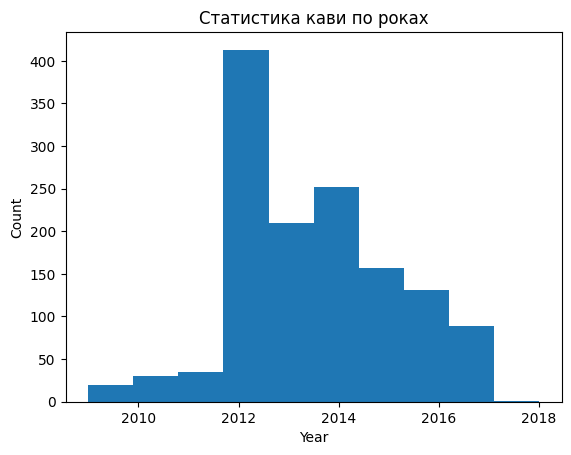

In [50]:
plt.hist(df['Year'])
plt.title('Статистика кави по роках')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

# Завдання 4

<h3>Проробити всі дії з пункту колекції Series і DataFrame бібліотеки pandas

Створення Series з індексами за замовчуванням

In [51]:
years = pd.Series(df['Year'])
years

0       2014
1       2014
2       2012
3       2014
4       2014
        ... 
1333    2016
1334    2016
1335    2014
1336    2013
1337    2013
Name: Year, Length: 1338, dtype: Int64

Створення колекції Series з однаковими значеннями

In [53]:
pd.Series(1, range(3))

0    1
1    1
2    1
dtype: int64

Звернення до елементів Series

In [54]:
years[113]

2011

Обчислення описових статистик для Series

In [55]:
years.count()

1338

In [56]:
years.mean()

2013.498505231689

In [57]:
years.min()

2009

In [58]:
years.max()

2018

In [59]:
years.std()

1.7972173726527854

In [60]:
years.describe()

count         1338.0
mean     2013.498505
std         1.797217
min           2009.0
25%           2012.0
50%           2013.0
75%           2015.0
max           2018.0
Name: Year, dtype: Float64

Створення колекції Series з нестандартними індексами

In [64]:
years2 = pd.Series(df['Year'].values, index=[f'Year{i+1}' for i in range(len(df['Year']))])

Словники як ініціалізатор

In [62]:
pd.Series({'One': 1, 'Two': 2, 'Three': 3})

One      1
Two      2
Three    3
dtype: int64

Звернення до елементів Series з використанням нестандартних
індексів

In [65]:
years2['Year37']

2012

In [67]:
years2.Year37

2012

In [69]:
years.dtype

Int64Dtype()

In [70]:
years.values

<IntegerArray>
[2014, 2014, 2012, 2014, 2014, 2013, 2012, 2010, 2010, 2014,
 ...
 2013, 2013, 2014, 2013, 2012, 2016, 2016, 2014, 2013, 2013]
Length: 1338, dtype: Int64

Створення колекції Series із рядковими елементами

In [72]:
methods = pd.Series(df['Processing_method'])
methods

0        Washed / Wet
1        Washed / Wet
2       Not specified
3       Natural / Dry
4        Washed / Wet
            ...      
1333    Not specified
1334    Not specified
1335    Natural / Dry
1336    Natural / Dry
1337    Natural / Dry
Name: Processing_method, Length: 1338, dtype: object

In [73]:
methods.str.contains('Dry')

0       False
1       False
2       False
3        True
4       False
        ...  
1333    False
1334    False
1335     True
1336     True
1337     True
Name: Processing_method, Length: 1338, dtype: bool

In [74]:
methods.str.upper()

0        WASHED / WET
1        WASHED / WET
2       NOT SPECIFIED
3       NATURAL / DRY
4        WASHED / WET
            ...      
1333    NOT SPECIFIED
1334    NOT SPECIFIED
1335    NATURAL / DRY
1336    NATURAL / DRY
1337    NATURAL / DRY
Name: Processing_method, Length: 1338, dtype: object

Створення DataFrame на базі словника

In [80]:
numbers_dict = {'One': [1, 1, 1], 'Two': [2, 2, 2], 'Three': [3, 3, 3]}
numbers = pd.DataFrame(numbers_dict)
numbers

,One,Two,Three
0,1,2,3
1,1,2,3
2,1,2,3


Налаштування індексів DataFrame з використанням атрибута
index

In [82]:
numbers.index = ['1', '2', '3']
numbers

,One,Two,Three
1,1,2,3
2,1,2,3
3,1,2,3


Звернення до стовпців DataFrame

In [83]:
numbers['One']

1    1
2    1
3    1
Name: One, dtype: int64

In [86]:
numbers.Two

1    2
2    2
3    2
Name: Two, dtype: int64

Вибір рядків з використанням атрибутів loc і iloc

In [89]:
numbers.loc['1']

One      1
Two      2
Three    3
Name: 1, dtype: int64

In [90]:
numbers.iloc[1]

One      1
Two      2
Three    3
Name: 2, dtype: int64

Вибір рядків з використанням атрибутів loc і iloc

In [91]:
numbers.loc['1':'3']

,One,Two,Three
1,1,2,3
2,1,2,3
3,1,2,3


In [92]:
numbers.iloc[0:3]

,One,Two,Three
1,1,2,3
2,1,2,3
3,1,2,3


In [93]:
numbers.loc[['1', '3']]

,One,Two,Three
1,1,2,3
3,1,2,3


In [94]:
numbers.iloc[[0, 2]]

,One,Two,Three
1,1,2,3
3,1,2,3


Вибір підмножин рядків і стовпців

In [96]:
numbers.loc['2':'3', ['One', 'Three']]

,One,Three
2,1,3
3,1,3


In [97]:
numbers.iloc[[0, 2], 0:3]

,One,Two,Three
1,1,2,3
3,1,2,3


Логічне індексування

In [98]:
numbers[numbers>=2]

,One,Two,Three
1,NaN,2,3
2,NaN,2,3
3,NaN,2,3


In [99]:
numbers[(numbers > 1) & (numbers < 3)]

,One,Two,Three
1,NaN,2,NaN
2,NaN,2,NaN
3,NaN,2,NaN


Звернення до конкретного осередку DataFrame по рядку і
стовпцю

In [100]:
numbers.at['2', 'Two']

2

In [101]:
numbers.iat[1, 1]

2

In [102]:
numbers.at['2', 'Two'] = 100
numbers.at['2', 'Two']

100

In [103]:
numbers.iat[1, 1] = 2
numbers.iat[1, 1]

2

Описова статистика

In [104]:
numbers.describe()

,One,Two,Three
count,3.0,3.0,3.0
mean,1.0,2.0,3.0
std,0.0,0.0,0.0
min,1.0,2.0,3.0
25%,1.0,2.0,3.0
50%,1.0,2.0,3.0
75%,1.0,2.0,3.0
max,1.0,2.0,3.0


In [149]:
pd.set_option('display.precision', 2)
numbers.describe()

,One,Two,Three
count,3.0,3.0,3.0
mean,1.0,2.0,3.0
std,0.0,0.0,0.0
min,1.0,2.0,3.0
25%,1.0,2.0,3.0
50%,1.0,2.0,3.0
75%,1.0,2.0,3.0
max,1.0,2.0,3.0


In [111]:
numbers.mean()

One      1.0
Two      2.0
Three    3.0
dtype: float64

Транспонування DataFrame з використанням атрибута T

In [112]:
numbers.T

,1,2,3
One,1,1,1
Two,2,2,2
Three,3,3,3


In [113]:
numbers.T.describe()

,1,2,3
count,3.0,3.0,3.0
mean,2.0,2.0,2.0
std,1.0,1.0,1.0
min,1.0,1.0,1.0
25%,1.5,1.5,1.5
50%,2.0,2.0,2.0
75%,2.5,2.5,2.5
max,3.0,3.0,3.0


In [114]:
numbers.T.mean()

1    2.0
2    2.0
3    2.0
dtype: float64

Сортування рядків за індексами

In [115]:
numbers.sort_index(ascending=False)

,One,Two,Three
3,1,2,3
2,1,2,3
1,1,2,3


Сортування за індексами стовпців

In [116]:
numbers.sort_index(axis=1, ascending=False)

,Two,Three,One
1,2,3,1
2,2,3,1
3,2,3,1


Сортування за значеннями стовпців

In [119]:
numbers.sort_values(by='1', axis=1, ascending=False)

,Three,Two,One
1,3,2,1
2,3,2,1
3,3,2,1


In [121]:
numbers.T.sort_values(by='One', axis=1, ascending=False)

,1,2,3
One,1,1,1
Two,2,2,2
Three,3,3,3


In [123]:
numbers.loc['1'].sort_values(ascending=False)

Three    3
Two      2
One      1
Name: 1, dtype: int64

# Завдання 6-11

Завантажити набір даних катастрофи «Титаніка» за URL-
адресою

In [127]:
titanic = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/TitanicSurvival.csv')

Переглянути рядки набору даних катастрофи «Титаніка»

In [128]:
titanic.head()

,rownames,survived,sex,age,passengerClass
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st


In [129]:
titanic.tail()

,rownames,survived,sex,age,passengerClass
1304,"Zabour, Miss. Hileni",no,female,14.5,3rd
1305,"Zabour, Miss. Thamine",no,female,NaN,3rd
1306,"Zakarian, Mr. Mapriededer",no,male,26.5,3rd
1307,"Zakarian, Mr. Ortin",no,male,27.0,3rd
1308,"Zimmerman, Mr. Leo",no,male,29.0,3rd


Налаштувати назви стовпців

In [130]:
titanic.columns = ['name', 'survived', 'sex', 'age', 'class']

In [131]:
titanic.head()

,name,survived,sex,age,class
0,"Allen, Miss. Elisabeth Walton",yes,female,29.0000,1st
1,"Allison, Master. Hudson Trevor",yes,male,0.9167,1st
2,"Allison, Miss. Helen Loraine",no,female,2.0000,1st
3,"Allison, Mr. Hudson Joshua Crei",no,male,30.0000,1st
4,"Allison, Mrs. Hudson J C (Bessi",no,female,25.0000,1st


Провести простий аналіз даних

Наймолодший пасажир

In [134]:
titanic.loc[titanic['age'].idxmin()]

name        Dean, Miss. Elizabeth Gladys M
survived                               yes
sex                                 female
age                                 0.1667
class                                  3rd
Name: 763, dtype: object

Найстарший пасажир

In [135]:
titanic.loc[titanic['age'].idxmax()]

name        Barkworth, Mr. Algernon Henry W
survived                                yes
sex                                    male
age                                    80.0
class                                   1st
Name: 14, dtype: object

Середній вік пасажирів

In [137]:
titanic['age'].mean()

29.881134512434034

Статистика по пасажирах, які вижили

In [138]:
titanic[titanic['survived'].str.contains('yes')].describe(include='all')

,name,survived,sex,age,class
count,500,500,500,427.0000,500
unique,500,1,2,NaN,3
top,"Allen, Miss. Elisabeth Walton",yes,female,NaN,1st
freq,1,500,339,NaN,200
mean,NaN,NaN,NaN,28.9182,NaN
std,NaN,NaN,NaN,15.0615,NaN
min,NaN,NaN,NaN,0.1667,NaN
25%,NaN,NaN,NaN,20.0000,NaN
50%,NaN,NaN,NaN,28.0000,NaN
75%,NaN,NaN,NaN,38.0000,NaN


Відсортувати всіх жінок з кают 1-го класу

In [141]:
woman_first_class = titanic[titanic['class'].str.startswith('1') & titanic['sex'].str.startswith('fe')]
woman_first_class.sort_values('age')

,name,survived,sex,age,class
2,"Allison, Miss. Helen Loraine",no,female,2.0,1st
55,"Carter, Miss. Lucile Polk",yes,female,14.0,1st
193,"Madill, Miss. Georgette Alexand",yes,female,15.0,1st
195,"Maioni, Miss. Roberta",yes,female,16.0,1st
159,"Hippach, Miss. Jean Gertrude",yes,female,16.0,1st
...,...,...,...,...,...
176,"Kenyon, Mrs. Frederick R (Mario",yes,female,NaN,1st
204,"Meyer, Mrs. Edgar Joseph (Leila",yes,female,NaN,1st
277,"Spencer, Mrs. William Augustus",yes,female,NaN,1st
293,"Taylor, Mrs. Elmer Zebley (Juli",yes,female,NaN,1st


Наймолодша серед цих жінок

In [143]:
woman_first_class.loc[woman_first_class['age'].idxmin()]

name        Allison, Miss. Helen Loraine
survived                              no
sex                               female
age                                  2.0
class                                1st
Name: 2, dtype: object

Найстарша серед цих жінок

In [144]:
woman_first_class.loc[woman_first_class['age'].idxmax()]

name        Cavendish, Mrs. Tyrell William
survived                               yes
sex                                 female
age                                   76.0
class                                  1st
Name: 61, dtype: object

Кількість із цих жінок, що вижила

In [147]:
woman_first_class.loc[woman_first_class['survived'].str.contains('yes')].dropna()['name'].count()

128

Побудувати гістограму віку пасажирів

array([[<Axes: title={'center': 'age'}>]], dtype=object)

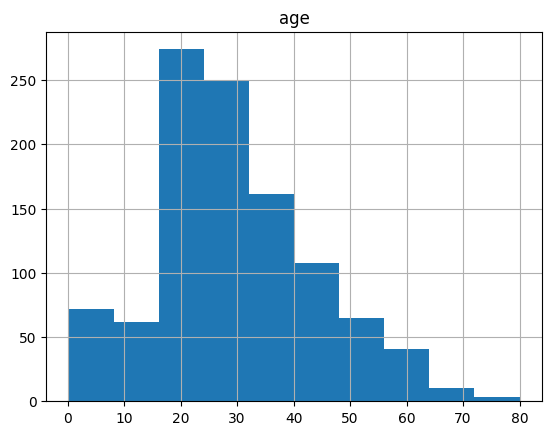

In [148]:
titanic.hist()